<a href="https://colab.research.google.com/github/Wenypb/Simulacion/blob/main/Medias_muestrales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Librerias**

In [41]:

import random as rnd
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy.stats as stats

### ***Estimar por simulación la integral de $\int_{0}^{1} \sqrt{arctan(x)} dx$***

# **Monte Carlo de la Media Muestral**

## **Algoritmo**

**Definir g(x):**

$g(x) = \sqrt{arctan(x)}$

***PASO 1:***
Generar la secuencia de $ [U_{i}]_{i=1}^{n} \sim$ $Unif(0,1)$

In [42]:
# Tomaremos n = 50
n = 50
#Lista_Ui-> Lista donde se guardaran todos los Ui generados
Lista_Ui=[]
for i in range(n):
  Ui=rnd.random()
  Lista_Ui.append(Ui)

***PASO 2:***
Calcular $ X_{i} = a + U_{i}(b -a )$


In [43]:
# De acuerdo al ejercicio:
#a -> Límite inferior de la integral
a = 0
#b -> Límite superior de la integral
b = 1
#Lista_Xi-> Lista donde se guardaran todos los Xi calculados
Lista_Xi=[]
for i in range(n):
  Xi= a + Lista_Ui[i]*(b-a)
  Lista_Xi.append(Xi)

***PASO 3:***
Calcular $g$ $( X_{i} )$


In [44]:
#Lista_gi-> Lista donde se guardaran todos los g(Xi) calculados
Lista_gi=[]
for i in range(n):
  gi= np.sqrt(np.arctan(Lista_Xi[i]))
  Lista_gi.append(gi)

***PASO 4:***
Estimar $I$ calculando la media muestral $\theta _{1}$


$\theta _{1}$ = $(b-a) \frac{1}{n} \sum_{i=1}^{n}g(X_{i})$


In [45]:
#Calcular la suma de todas las g(Xi)
#--sum_gi-> Suma de las g(Xi)
sum_gi=sum(Lista_gi)
#Calcular el estimador
estimador = (b-a)*(1/n)*(sum_gi)
print("El valor estimado de I es",estimador)

El valor estimado de I es 0.6455333401443417


## **Generar el algortimo N veces**

**Funcion**

In [46]:
def Fun_Media_muestral(N):
  #Limites de integracion
  a=0
  b=1
  #Numero de Ui generados
  n=50
  #Lista_esti -> Lista donde se guardaran todos los estimadores calculados
  Lista_esti =[]
  for i in range(N):
    #Lista_Ui-> Lista donde se guardaran todos los Ui generados
    Lista_Ui=[]
    for i in range(n):
      Ui=rnd.random()
      Lista_Ui.append(Ui)
    #Lista_Xi-> Lista donde se guardaran todos los Xi calculados
    Lista_Xi=[]
    for i in range(n):
      Xi= a + Lista_Ui[i]*(b-a)
      Lista_Xi.append(Xi)
    #Lista_gi-> Lista donde se guardaran todos los g(Xi) calculados
    Lista_gi=[]
    for i in range(n):
      gi= np.sqrt(np.arctan(Lista_Xi[i]))
      Lista_gi.append(gi)
    #--sum_gi-> Suma de las g(Xi)
    sum_gi=sum(Lista_gi)
    #Calcular el estimador
    estimador = (b-a)*(1/n)*(sum_gi)
    Lista_esti.append(estimador)
  return Lista_esti


**Histograma**

(array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,
         1.,  1.,  0.,  0.,  0.,  1.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  1.,  1.,  0.,  1.,  1.,  0.,  0.,  1.,  0.,
         0.,  0.,  1.,  0.,  0.,  0.,  5.,  1.,  0.,  0.,  2.,  0.,  0.,
         1.,  1.,  3.,  0.,  0.,  1.,  1.,  2.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  0.,  0.,  0.,  1.,  1.,  1.,  0.,  4.,  0.,  1.,  0.,
         4.,  3.,  5.,  3.,  2.,  3.,  1.,  0.,  5.,  3.,  5.,  2.,  3.,
         5.,  4.,  2.,  1.,  3.,  3.,  4.,  5.,  3.,  4.,  5.,  4.,  4.,
         7.,  3.,  5.,  8.,  2.,  7.,  1.,  8.,  7.,  3.,  8.,  6.,  4.,
         7.,  5., 11.,  9.,  8.,  8.,  4.,  7.,  4.,  5., 10., 12.,  9.,
        10.,  5., 13.,  5.,  8.,  7.,  6., 12., 13.

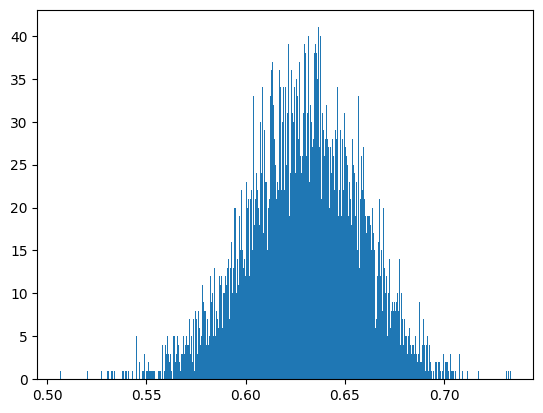

In [47]:
# N -> Número de experimentos con n iteracciones
N =5000
G = Fun_Media_muestral(N)
plt.hist(G,bins=500)

## **Intervalos de confianza de 95%**

Calcular los intervalos de confianza

$\bar{x} -\frac{S}{\sqrt{N}}t_{N-1,\frac{\alpha}{2}}\leq \mu \leq \bar{x} + \frac{S}{\sqrt{N}}t_{N-1,\frac{\alpha}{2}} $

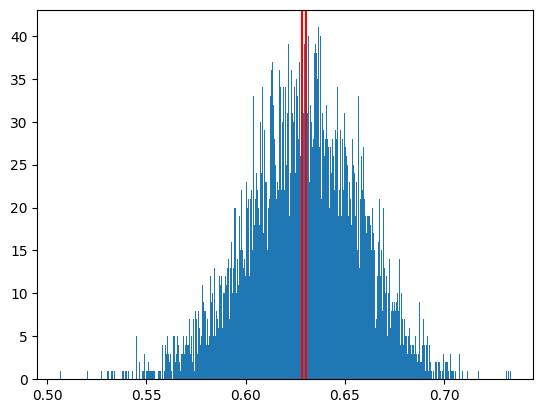

In [48]:
# Confianza -> Nivel de confianza de la prueba (95%)
Confianza = 0.95
# Gl-> Grados de libertad
Gl = len(G) - 1
# Media y desviación estándar de la muestra
media_muestra = np.mean(G)
desviacion_muestra = np.std(G, ddof=1)
# Val_cri ->  Valor crítico de t (a/2,N-1)
Val_cri = stats.t.ppf((1 + Confianza) / 2, Gl)
# e_estandar ->  Error estándar
e_estandar = desviacion_muestra / np.sqrt(len(G))
# Límites del intervalo de confianza
inter_inferior_MM = media_muestra - Val_cri * e_estandar
inter_superior_MM = media_muestra + Val_cri * e_estandar
plt.hist(G,bins=500)
plt.axvline(inter_inferior_MM,color="red")
plt.axvline(inter_superior_MM,color="red")

# **Monte Carlo de Acierto y Error**

## **Algoritmo**

**Definir g(x):**

$g(x) = \sqrt{arctan(x)}$

***PASO 1:***
Paso 1: Generar una secuencia. $ [U_{i}]_{i=1}^{2n} \sim$ $Unif(0,1)$

In [49]:
# Tomaremos n = 50
n = 50
#Lista_Uis-> Lista donde se guardaran todos los Ui generados
Lista_Uis=[]
for i in range(2*n):
  Ui=rnd.random()
  Lista_Uis.append(Ui)


***PASO 2:***
Conformar pares $(U_{i},U_{n+i})$ para $i = 1,2,...,n$




In [50]:
#Lista_Ui-> Lista de los Ui con i=1,2,..,n
Lista_Ui=[]
#Lista_Un_i-> Lista de los Un+i con i=1,2,..,n
Lista_Un_i=[]
for i in range(n):
  Ui=Lista_Uis[i]
  Lista_Ui.append(Ui)
  Un_i=Lista_Uis[n+i]
  Lista_Un_i.append(Un_i)




**Paso 3:** Calcular $X_{i} = a + U_{i}(b − a)$ para $i = 1,2,...,n$

In [51]:
# De acuerdo al ejercicio:
#a -> Límite inferior de la integral
a = 0
#b -> Límite superior de la integral
b = 1
#Lista_Xi-> Lista donde se guardaran todos los Xi calculados
Lista_Xi=[]
for i in range(n):
  Xi= a + Lista_Ui[i]*(b-a)
  Lista_Xi.append(Xi)

***PASO 4:***
Calcular $g$ $( X_{i} )$


In [52]:
#Lista_gi-> Lista donde se guardaran todos los g(Xi) calculados
Lista_gi=[]
for i in range(n):
  gi= np.sqrt(np.arctan(Lista_Xi[i]))
  Lista_gi.append(gi)

***PASO 5:***
Contar los aciertos $n_{a}$ tales que $g(Xi) > cU_{n+i}$ con c = 1 $⟶$ $g(Xi) > U_{n+i}$ para $i = 1,2,...,n$ y gráficar experimento:
.

n_a = 36


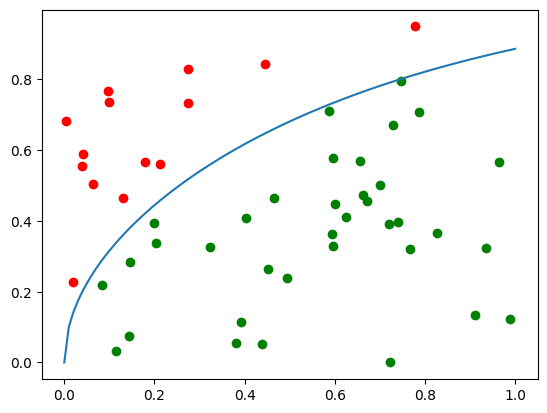

In [53]:
#Grafica de g(x)
x=np.linspace(0,1,100)
plt.plot(x,np.sqrt(np.arctan(x)))
#n_a -> Número de aciertos (exitos)
n_a = 0
for i in range(n):
  g_xi=Lista_gi[i]
  Un_i=Lista_Un_i[i]
  if g_xi > Un_i:
    plt.scatter(Lista_Ui[i],Un_i,color="green")
    n_a=n_a+1
  else:
    plt.scatter(Lista_Ui[i],Un_i,color="red")
print("n_a =",n_a)

***PASO 6:***
Estimar $I$ calculando la media muestral $\theta _{2}$


$\theta _{2}$ = $c(b-a) \frac{n_{a}}{n} $ si $c=1$ entonces, $\theta _{2}$ = $(b-a) \frac{n_{a}}{n} $


In [54]:
#Calcular estimador
#a -> Límite inferior de la integral
a = 0
#b -> Límite superior de la integral
b = 1
estimador = (b-a)*(n_a/n)
print("El valor estimado de I es",estimador)

El valor estimado de I es 0.72


## **Generar el algortimo N veces**

**Funcion**

In [55]:
def Fun_Acierto_Error(N):
  #Limites de integracion
  a=0
  b=1
  #Numero de Ui generados
  n=50
  #Lista_esti -> Lista donde se guardaran todos los estimadores calculados
  Lista_esti =[]
  for i in range(N):
    #Lista_Uis-> Lista donde se guardaran todos los Ui generados
    Lista_Uis=[]
    for i in range(2*n):
      Ui=rnd.random()
      Lista_Uis.append(Ui)
    #Lista_Ui-> Lista de los Ui con i=1,2,..,n
    Lista_Ui=[]
    #Lista_Un_i-> Lista de los Un+i con i=1,2,..,n
    Lista_Un_i=[]
    for i in range(n):
      Ui=Lista_Uis[i]
      Lista_Ui.append(Ui)
      Un_i=Lista_Uis[n+i]
      Lista_Un_i.append(Un_i)
    #Lista_Xi-> Lista donde se guardaran todos los Xi calculados
    Lista_Xi=[]
    for i in range(n):
      Xi= a + Lista_Ui[i]*(b-a)
      Lista_Xi.append(Xi)
    #Lista_gi-> Lista donde se guardaran todos los g(Xi) calculados
    Lista_gi=[]
    for i in range(n):
      gi= np.sqrt(np.arctan(Lista_Xi[i]))
      Lista_gi.append(gi)
    #n_a -> Número de aciertos (exitos)
    n_a = 0
    for i in range(n):
      g_xi=Lista_gi[i]
      Un_i=Lista_Un_i[i]
      if g_xi > Un_i:
        n_a=n_a+1
    #Calcular estimador
    estimador = (b-a)*(n_a/n)
    Lista_esti.append(estimador)
  return Lista_esti

**Histograma**

(array([  1.,   0.,   0.,   0.,   2.,   0.,   0.,   0.,   3.,   0.,   0.,
          0.,   0.,  18.,   0.,   0.,   0.,  34.,   0.,   0.,   0.,  66.,
          0.,   0.,   0.,   0.,  97.,   0.,   0.,   0., 156.,   0.,   0.,
          0., 278.,   0.,   0.,   0.,   0., 325.,   0.,   0.,   0., 446.,
          0.,   0.,   0., 502.,   0.,   0.,   0.,   0., 562.,   0.,   0.,
          0., 572.,   0.,   0.,   0., 545.,   0.,   0.,   0.,   0., 472.,
          0.,   0.,   0., 336.,   0.,   0.,   0., 258.,   0.,   0.,   0.,
          0., 156.,   0.,   0.,   0.,  82.,   0.,   0.,   0.,  56.,   0.,
          0.,   0.,   0.,  23.,   0.,   0.,   0.,   7.,   0.,   0.,   0.,
          3.]),
 array([0.38  , 0.3846, 0.3892, 0.3938, 0.3984, 0.403 , 0.4076, 0.4122,
        0.4168, 0.4214, 0.426 , 0.4306, 0.4352, 0.4398, 0.4444, 0.449 ,
        0.4536, 0.4582, 0.4628, 0.4674, 0.472 , 0.4766, 0.4812, 0.4858,
        0.4904, 0.495 , 0.4996, 0.5042, 0.5088, 0.5134, 0.518 , 0.5226,
        0.5272, 0.5318, 0.5364

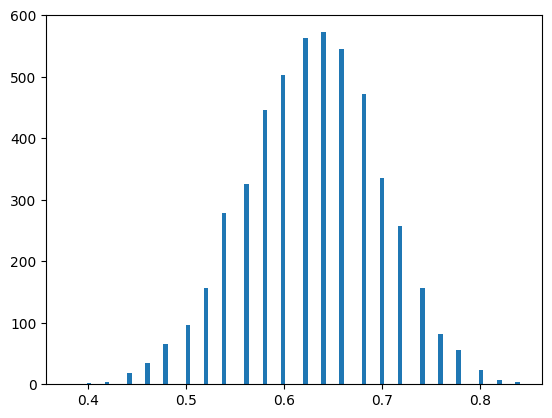

In [56]:
# N -> Número de experimentos con n iteracciones
N =5000
H = Fun_Acierto_Error(N)
plt.hist(H,bins=100)

## **Intervalos de confianza de 95%**

Calcular los intervalos de confianza

$\bar{x} -\frac{S}{\sqrt{N}}t_{N-1,\frac{\alpha}{2}}\leq \mu \leq \bar{x} + \frac{S}{\sqrt{N}}t_{N-1,\frac{\alpha}{2}} $

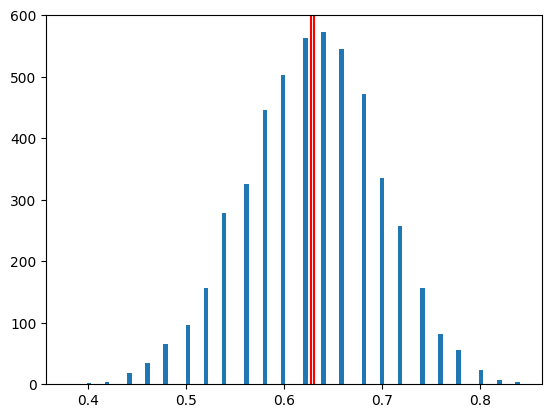

In [57]:
# Confianza -> Nivel de confianza de la prueba (95%)
Confianza = 0.95
# Gl-> Grados de libertad
Gl = len(H) - 1
# Media y desviación estándar de la muestra
media_muestra = np.mean(H)
desviacion_muestra = np.std(H, ddof=1)
# Val_cri ->  Valor crítico de t (a/2,N-1)
Val_cri = stats.t.ppf((1 + Confianza) / 2, Gl)
# e_estandar ->  Error estándar
e_estandar = desviacion_muestra / np.sqrt(len(H))
# Límites del intervalo de confianza
inter_inferior_AR = media_muestra - Val_cri * e_estandar
inter_superior_AR = media_muestra + Val_cri * e_estandar
plt.hist(H,bins=100)
plt.axvline(inter_inferior_AR,color="red")
plt.axvline(inter_superior_AR,color="red")

# **Comparacion**


Considerando los mismos valores tanto de n = 50 como de N = 10000, obtuvimos los siguientes valores representativos de la media $(\bar{x})$ y del intervalo de confianza de $\mu$, para ambos métodos.

In [58]:
print("------Valores de Media Muestral------")
print("media =",np.mean(G))
print("Intervalo inferior=",inter_inferior_MM)
print("Intervalo superior=",inter_superior_MM)
print("------Valores de Aceptacion y Rechazo------")
print("media =",np.mean(H))
print("Intervalo inferior=",inter_inferior_AR)
print("Intervalo superior=",inter_superior_AR)

------Valores de Media Muestral------
media = 0.6294395233934853
Intervalo inferior= 0.6286387022713905
Intervalo superior= 0.6302403445155801
------Valores de Aceptacion y Rechazo------
media = 0.628708
Intervalo inferior= 0.6268090828657963
Intervalo superior= 0.6306069171342038


Podemos darnos cuenta que los valores son muy similares por lo que podemos concluir que ambos métodos son buenas opciones para aproximar la integral de este ejercicio, aunque el método de Aceptacion y Rechazo tiene dos pasos mas que Medias Muestrales lo que genera mas trabajo para calcularse.